<a href="https://colab.research.google.com/github/hrishikeshghosh/Docurer/blob/model_brainTumor/Brain_tumor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip 

!unzip "/content/brain_tumor data set.zip"
!rm "/content/brain_tumor data set.zip"

--2023-05-11 06:03:49--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2023-05-11 06:03:49--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec1d151de2849a4abd5a28b1ba.dl.dropboxusercontent.com/cd/0/inline/B71cbMnVjUIkU6r9bkslY1tllU4OXIQGMw5qpwKNIUzAXzUQijaAftWpwbaNBa9jtvgcwCYJoFuHuvFW1y1l6s4HB8oU3FQFwNOs1nCX3wXHMK9bExtk1vN8ClInCvJkKsTNvT2dQLHoygpUnqL_KmiT5R1Q9ypilDtrOMN2Jqtqkg/file# [following]
--2023-05-11 06:03:50--  https://ucec1d151de2849a4abd5a28b1ba.dl.dropboxusercontent.com/cd/0/inline/B71cbMnVjUIkU6r9bkslY1tllU4OXIQG

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [4]:
#count the number of images in the respective classes

ROOT_DIR = "/content/Brain Tumor Data Set"

num_of_images = {}

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

num_of_images

{'Brain Tumor': 2513, 'Healthey': 2087}

In [5]:
# we create a training folder |

if not os.path.exists("./train"): 
  os.mkdir("./train")

  for dir in os.listdir (ROOT_DIR):

    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join (ROOT_DIR, dir) ), 
                                size= (math.floor(70/100* num_of_images [dir])-5), replace=False ):

      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./train',dir)
      shutil.copy(O,D)
      os.remove(O)

else:

  print("Train Folder exsists")

In [6]:
# we create a test folder 
if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ),
                                size = (math.floor(15/100*num_of_images[dir])-5) , replace=False):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./test',dir)
      shutil.copy(O,D)
      os.remove(O)

else:
  print("Test folder exists")

In [7]:
# we create a validation folder
if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ),
                                size = (math.floor(15/100*num_of_images[dir])-5) , replace=False):
      
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./val',dir)
      shutil.copy(O,D)
      os.remove(O)

else:
  print("Validation folder exists")

We have successfully divided our data

Now build the model

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.utils import load_img, img_to_array
import keras

In [9]:
#cnn model 

model = Sequential()
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape = (224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'  ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [10]:
train_datagen = image.ImageDataGenerator(
    zoom_range = 0.2, shear_range = 0.2, rescale = 1./255, horizontal_flip = True
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [11]:
train_data = train_datagen.flow_from_directory(directory= "/content/train", target_size=(224,224), batch_size=32, class_mode = 'binary',) 


Found 3209 images belonging to 2 classes.


In [12]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [13]:
val_data = train_datagen.flow_from_directory(directory= "/content/val", target_size=(224,224), batch_size=32, class_mode = 'binary',) 


Found 679 images belonging to 2 classes.


In [14]:
test_data = train_datagen.flow_from_directory(directory= "/content/test", target_size=(224,224), batch_size=32, class_mode = 'binary',) 


Found 679 images belonging to 2 classes.


In [15]:
# havng early stopping and model check point 


from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping 
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=5, verbose=1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_vest_only=True, modde='auto')

# putting call back in list
call_back = [es,mc]

In [16]:
hist = model.fit_generator(generator=train_data,
                           steps_per_epoch=8,
                           epochs=30, verbose=1,
                           validation_data = val_data,
                           validation_steps=16,
                           callbacks = call_back)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.5547
Epoch 1: saving model to best_model.h5
8/8 [==============================] - 73s 9s/step - loss: 0.7050 - accuracy: 0.5547 - val_loss: 0.6917 - val_accuracy: 0.4980
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.5000
Epoch 2: saving model to best_model.h5
8/8 [==============================] - 84s 11s/step - loss: 0.6966 - accuracy: 0.5000 - val_loss: 0.6843 - val_accuracy: 0.5332
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5625
Epoch 3: saving model to best_model.h5
8/8 [==============================] - 84s 11s/step - loss: 0.6834 - accuracy: 0.5625 - val_loss: 0.6657 - val_accuracy: 0.5723
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5586
Epoch 4: saving model to best_model.h5
8/8 [==============================] - 69s 9s/step - loss: 0.6700 - accuracy: 0.5586 - val_lo

In [17]:
# loading the best fit model
from keras.models import load_model

model = load_model("/content/best_model.h5")

Model Accuracy

In [19]:
# checking out the accuracy of our model

acc = model.evaluate_generator(generator = test_data)[1]

print(f"the accuracy of your model is {acc*100} %")

the accuracy of your model is 77.46686339378357 %


In [20]:
h = hist.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

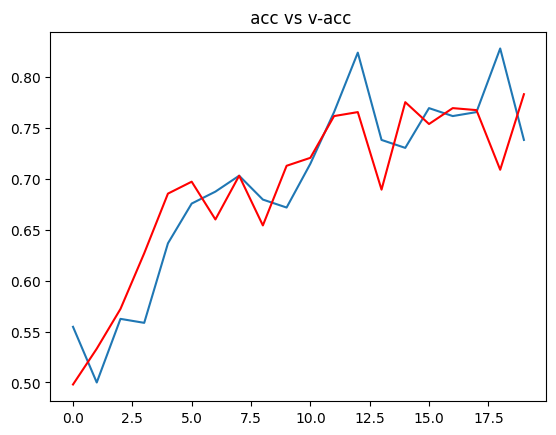

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title(" acc vs v-acc")
plt.show()

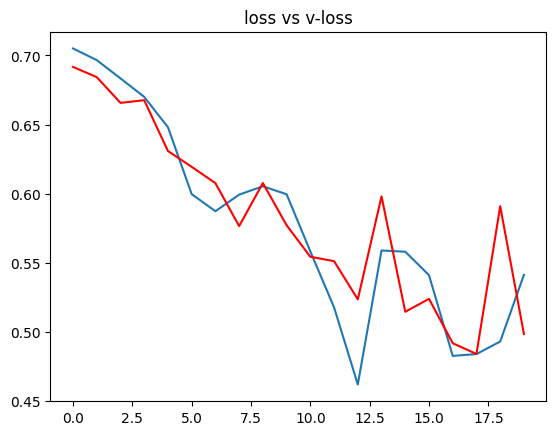

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs v-loss")
plt.show()

In [43]:
# path for the image to see if it predicts correct class

path = "/content/Brain Tumor Data Set/Brain Tumor/Cancer (1779).jpg"
img = load_img(path,target_size=(224,224),  )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape


pred = np.argmax(model.predict(input_arr),axis=1)

if pred == 0:
  print("The MRI image is of BRAIN TUMOR")
else:
  print("The MRI image is of HEALTHY BRAIN")

1/1 [==============================] - 0s 65ms/step
The MRI image is of BRAIN TUMOR
